# Analysis of growth QTLs from GxE paper

In [62]:
library(ggplot2);
library(plyr);
library(dplyr);
library(reshape2);
library(pheatmap);
library(RColorBrewer);

In [56]:
gQTL = read.delim("../data/journal.pgen.1003803.s016.TXT",sep="\t", skip=5)
gQTL_rename = gQTL[,4:dim(gQTL)[2]]
rownames(gQTL_rename) = apply(gQTL,1,function(i){paste(i[1:3],collapse="_")})

In [16]:
head(gQTL)

,chrom,start,stop,SC_BPS,SD,SDMalt,SDRaff,YCB,YPD,YPD_37C,YPD_BPS,YPD_CaCl2,YPD_Fluco,YPD_KCl_0.5M,YPD_KCl_1M,YPD_NaCl,YPD_Radi,YPD_Rapa,YPD_Rapa_10,YPE,YPE_37C,YPFruc,YPGly,YPLac,YPMalt,YPMalt_37C,YPRaff,YPSucrose,YP_low_Glu
1,chr01,194689,194964,0.9376146,0.9963095,0.9427827,0.9778873,0.9739161,0.9521714,0.9979204,0.9840454,0.8171904,0.893183,0.9966338,0.8483619,0.7067893,0.8928074,0.9040796,0.04790628,0.8914208,0.9993564,0.8152174,0.9476164,0.7836308,0.6826159,0.9858206,0.9798787,0.8648143,0.9600414
2,chr02,164136,164249,0.9376146,0.9963095,0.9385784,0.5595503,0.9999978,0.3699735,0.9722205,0.9931695,0.7085616,0.9182047,0.6601464,0.9786035,0.7411467,0.6973375,0.9330606,0.9695586,0.6098068,0.9993564,0.7796533,0.5116664,0.146491,0.9875742,0.9858206,0.04380427,0.7224286,0.6460363
3,chr02,522911,552978,0.9376146,0.6480658,0.9356478,0.7080419,0.9718821,0.02553691,0.5809135,5.013045e-07,0.7124593,0.01411654,0.0266513,0.2735383,0.6800903,0.001014331,0.2042327,0.01516302,0.3891543,0.9993564,3.077107e-05,0.7584528,0.09727236,0.7173451,0.9858206,0.1320222,0.03035355,0.3392328
4,chr02,669013,669013,0.9376146,0.7381722,0.9141408,0.2853307,0.8856945,0.005310404,0.9015955,0.001315777,0.6541163,0.893183,0.425677,0.3856046,0.7118343,0.007035857,0.7549886,0.5315571,0.943868,0.9993564,3.077107e-05,0.5802195,0.2166764,0.3348987,0.9858206,0.2212407,0.05647101,0.7767024
5,chr04,17940,22923,0.9483735,0.7414443,0.6387608,0.9777767,0.9718821,0.0437988,0.8450279,0.8213057,0.7085616,0.9670661,0.03968952,0.7256141,0.3809135,0.8391538,0.6060744,0.7526012,0.3891543,0.9993564,0.9002654,0.2109632,0.2579731,0.3274853,0.9858206,0.2557783,0.1669537,0.3530702
6,chr04,1416729,1416729,0.9384138,0.9963095,0.8425677,0.9777767,0.9964503,0.4133357,0.9226594,0.9819162,0.9732448,0.8981371,0.3416349,0.8479716,0.6800903,0.8755617,0.9040796,0.903093,0.6098068,0.9993564,0.9981741,0.4095061,0.7574944,0.008313357,0.9858206,0.2212407,0.7257473,0.6169512



#### NOTE: Values denote "q-value of most significant marker within QTL interval in the respective growth condition" 

i.e., Significant values are close to zero

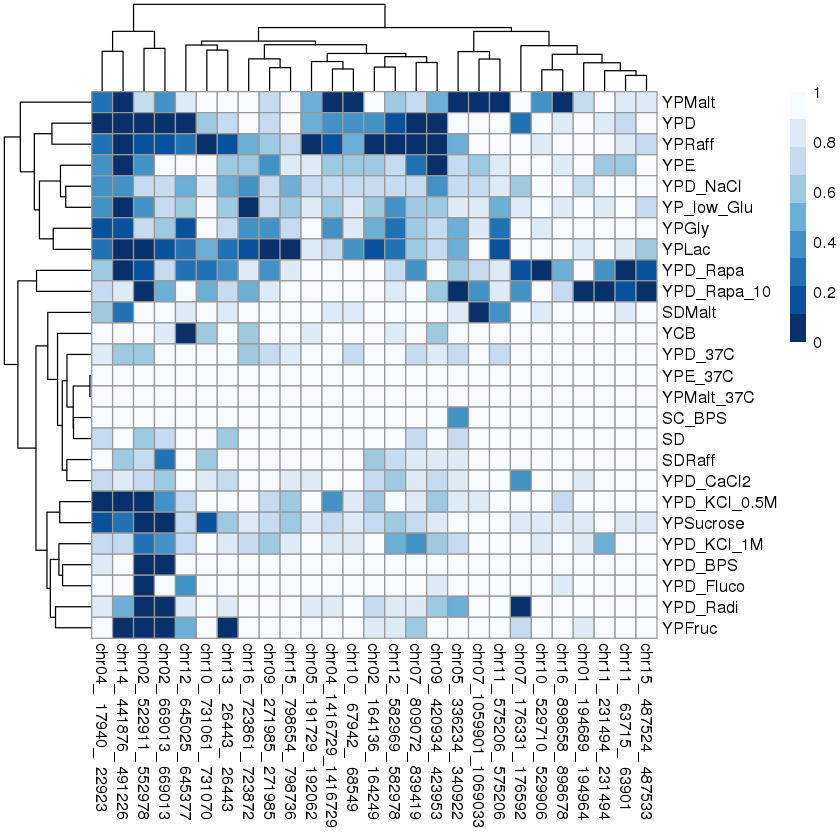

In [80]:
pheatmap(t(gQTL_rename), color = rev(brewer.pal(9, "Blues")), breaks=seq(0,1,length.out=10))

## Correlation between environments

Warning message:
In cor(env_scores): the standard deviation is zero

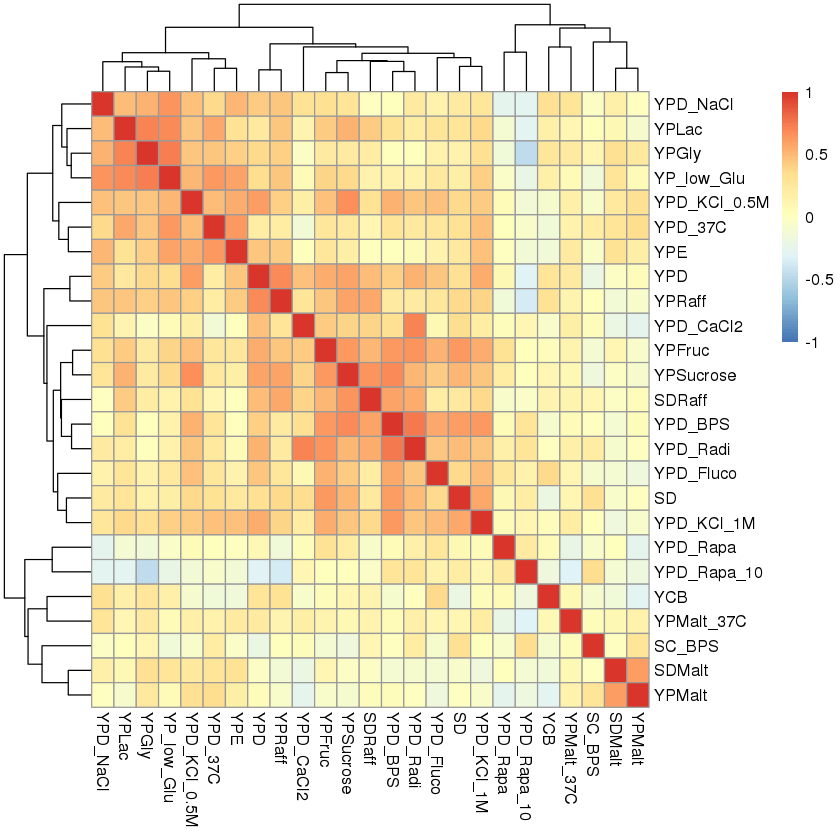

In [36]:
env_scores = gQTL[,4:dim(gQTL)[2]]
cor_env_scores = cor(env_scores)
toremove1 = apply(cor_env_scores,1,function(i){sum(is.na(i))})>1
toremove2 = apply(cor_env_scores,2,function(i){sum(is.na(i))})>1
cor_env_scores = cor_env_scores[!toremove1,!toremove2]
pheatmap(cor_env_scores,breaks = seq(-1,1,length.out=100))

## Length of gQTL intervals

In [53]:
gQTL_len = as.data.frame(cbind(gQTL[,1:3],QTL_len=abs(gQTL[,"start"] - gQTL[,"stop"])))
gQTL_len %>% arrange(QTL_len)

,chrom,start,stop,QTL_len
1,chr02,669013,669013,0
2,chr04,1416729,1416729,0
3,chr09,271985,271985,0
4,chr11,231494,231494,0
5,chr11,575206,575206,0
6,chr13,26443,26443,0
7,chr10,731061,731070,9
8,chr12,582969,582978,9
9,chr15,487524,487533,9
10,chr16,723861,723872,11


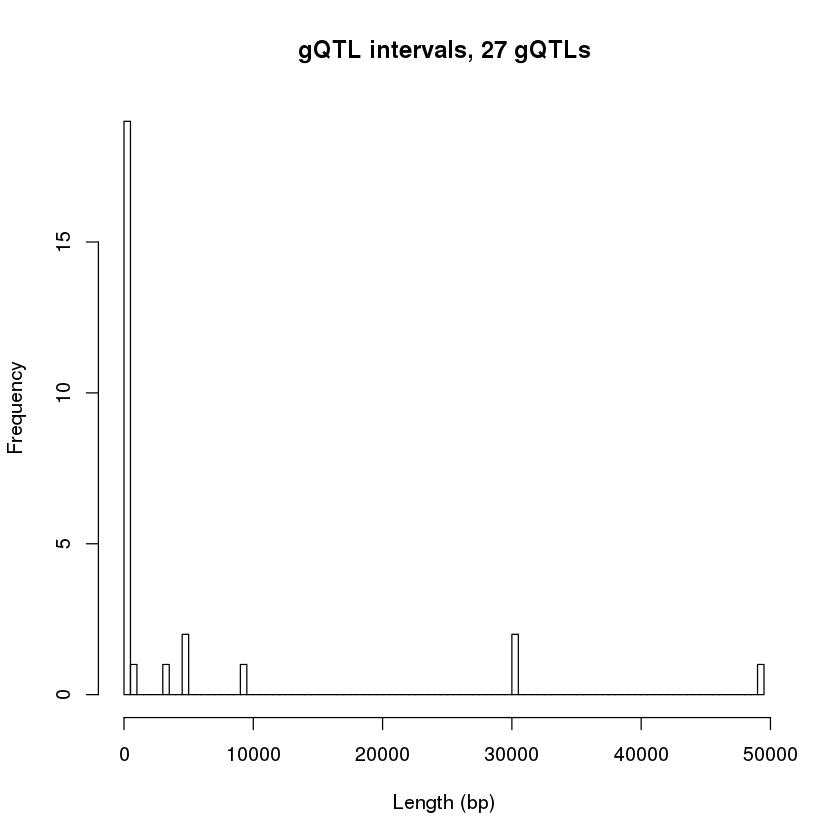

In [77]:
hist(abs(gQTL[,"start"] - gQTL[,"stop"]),breaks = 100, main = "gQTL intervals, 27 gQTLs", xlab = "Length (bp)")